In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def make_data(n=50):
    rng = np.random.RandomState(0)
    X = rng.rand(n, 1) * 10
    err = rng.normal(size=n) * 0.3
    y = np.sin(X).ravel() + err
    return X, y

In [3]:
def plot_data(X, y):
    plt.scatter(X, y, color='k')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

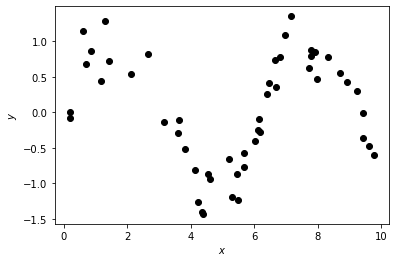

In [4]:
X, y = make_data(50)
plot_data(X, y)
plt.savefig('figures/sin_data.pdf')

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

def LassoPolynomialRegression(degree=10, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('lasso', Lasso(alpha))])

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+00, tolerance: 2.851e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+00, tolerance: 2.851e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+00, toleranc

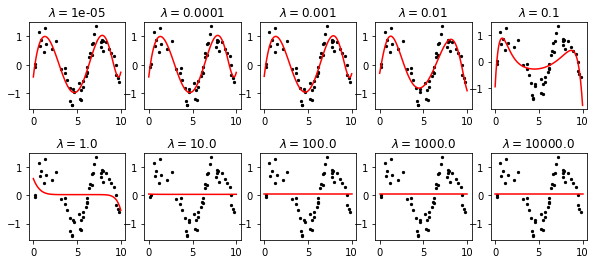

In [6]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
alpha = 0.00001

for ax in axes.flat:
    reg = LassoPolynomialRegression(alpha=alpha)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
    ax.scatter(X, y, color='k', s=5)
    alpha *= 10

plt.savefig('figures/lasso.pdf')

In [7]:
np.set_printoptions(suppress=True)

alpha = 0.00001
for i in range(10):
    reg = LassoPolynomialRegression(degree=10, alpha=alpha)
    reg.fit(X, y)
    intercept = reg.named_steps['lasso'].intercept_
    coef = reg.named_steps['lasso'].coef_[1:]
    coef = np.hstack((intercept, coef))
    print(np.round(coef, 5))
    alpha *= 10

[-0.79049  1.46824  2.64    -1.16847 -1.37768  0.01916  0.13514  0.04171
  0.0278   0.00626 -0.00133]
[-0.78896  1.46588  2.62935 -1.16567 -1.36644  0.01959  0.1321   0.04094
  0.02761  0.00637 -0.00124]
[-0.77349  1.44081  2.52203 -1.13307 -1.25259  0.02064  0.10069  0.03379
  0.02593  0.00753 -0.00027]
[-0.61955  1.19047  1.52316 -0.80913 -0.29971 -0.      -0.10974 -0.
  0.00023  0.00927  0.00638]
[-0.24686  0.23333  0.36842  0.       0.      -0.       0.02202 -0.04039
  0.      -0.00036 -0.00873]
[ 0.01985  0.       0.      -0.       0.      -0.       0.      -0.
  0.      -0.00311 -0.00095]
[ 0.02886 -0.       0.      -0.       0.      -0.       0.      -0.
  0.      -0.       0.00001]
[ 0.02946 -0.       0.      -0.       0.      -0.       0.      -0.
  0.      -0.       0.     ]
[ 0.02946 -0.       0.      -0.       0.      -0.       0.      -0.
  0.      -0.       0.     ]
[ 0.02946 -0.       0.      -0.       0.      -0.       0.      -0.
  0.      -0.       0.     ]


C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+00, tolerance: 2.851e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+00, tolerance: 2.851e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+00, toleranc

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polyfeatures__degree': np.arange(1, 11),
    'lasso__alpha': np.logspace(-5, 4, num=10)
}

grid = GridSearchCV(LassoPolynomialRegression(), param_grid, n_jobs=-1)
grid.fit(X, y)

print(grid.best_params_)

{'lasso__alpha': 1e-05, 'polyfeatures__degree': 6}


C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.012e+00, tolerance: 2.851e-03
  model = cd_fast.enet_coordinate_descent(
